# Imports

In [34]:
%run Imports.ipynb

c:\Users\benjf\anaconda3\envs\Work\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [40]:
from pygam import LinearGAM, s, f, te, LogisticGAM, PoissonGAM, GammaGAM
from pygam.datasets import wage

# Data

In [4]:
X, y = wage(return_X_y=True)
X

array([[2.006e+03, 1.800e+01, 0.000e+00],
       [2.004e+03, 2.400e+01, 3.000e+00],
       [2.003e+03, 4.500e+01, 2.000e+00],
       ...,
       [2.005e+03, 2.700e+01, 0.000e+00],
       [2.005e+03, 2.700e+01, 2.000e+00],
       [2.009e+03, 5.500e+01, 1.000e+00]])

In [31]:
name = 'Kred'
path = '../../ANOR1/pickle/2_FS/'

key_featsubgroups = pd.read_pickle(path + name + '/key_featsubgroups.pkl')
df = pd.read_pickle(path + name + '/2_df_new_.pkl')

In [35]:
print(df[target].value_counts()/df.shape[0])
print('df_shape: ', df.shape)

arrears
1   0.646
0   0.354
Name: count, dtype: float64
df_shape:  (129457, 418)


# Functions

## Play ground

In [ ]:
# test
LogisticGAM

## Functions

In [ ]:
def basic_gam(gam, df):
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = split_data_4(df)

    # Initialize a results dictionary
    results_dict = {}

    model = gam
    results_dict = model_pred(X_train, y_train, X_test, y_test, model, 'GAM', 'opt', results_dict)
    return None


In [36]:
def split_data_4(df, key_featsubgroups=key_featsubgroups, target=target, test_size=0.2, random_state=42):
    """
    Splits the dataset into training and testing sets while excluding demographic features.

    Parameters:
    df (DataFrame): The dataset containing features and target variable.
    key_featsubgroups (DataFrame): A mapping of feature subgroups.
    target (str): The name of the target variable.
    test_size (float, optional): The proportion of the dataset to allocate for testing. Default is 0.2.
    random_state (int, optional): Random seed for reproducibility. Default is 42.

    Returns:
    tuple: X_train, X_test, y_train, y_test (training and testing datasets)
    """

    # Extract demographic features
    demo_feat = key_featsubgroups.loc[key_featsubgroups['subgroup'] == 'demo', 'list_features'].values[0]
    print("Demographic Features:", demo_feat)

    # Separate features (X) and target variable (y), excluding demographic features
    X = df.drop(columns=[target] + demo_feat)
    y = df[target]

    # Split the dataset into training (80%) and testing (20%) sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )

    # Print dataset shapes
    print(f"Training Features Shape: {X_train.shape}")
    print(f"Training Labels Shape: {y_train.shape}")
    print(f"Testing Features Shape: {X_test.shape}")
    print(f"Testing Labels Shape: {y_test.shape}")

    return X_train, X_test, y_train, y_test

In [37]:
x_train, x_test, y_train, y_test = split_data_4(df)

Demographic Features: ['clientdata.demo.gender', 'clientdata.demo.age_year', 'clientdata.demo.age_month', 'clientdata.demo.children', 'clientdata.demo.children_singleparent', 'clientdata.demo.maritalstatus_expand_SINGLE', 'clientdata.demo.maritalstatus_expand_MARRIED', 'clientdata.demo.maritalstatus_expand_DIVORCED', 'clientdata.demo.maritalstatus_expand_WIDOWED', 'clientdata.demo.maritalstatus_expand_newvalue', 'clientdata.demo.maritalstatus_woe']
Training Features Shape: (103565, 406)
Training Labels Shape: (103565,)
Testing Features Shape: (25892, 406)
Testing Labels Shape: (25892,)


# An Experiment

based on: [Link](https://pygam.readthedocs.io/en/latest/notebooks/tour_of_pygam.html#Regression)

## Programming after Tutorial

In [ ]:
gam = LinearGAM(s(0) + s(1) + f(2))

  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
  9% (1 of 11) |##                       | Elapsed Time: 0:00:00 ETA:   0:00:00
 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:   0:00:00
 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:00
 54% (6 of 11) |#############            | Elapsed Time: 0:00:00 ETA:   0:00:00
 72% (8 of 11) |##################       | Elapsed Time: 0:00:00 ETA:   0:00:00
 90% (10 of 11) |#####################   | Elapsed Time: 0:00:00 ETA:   0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


<Figure size 640x480 with 0 Axes>

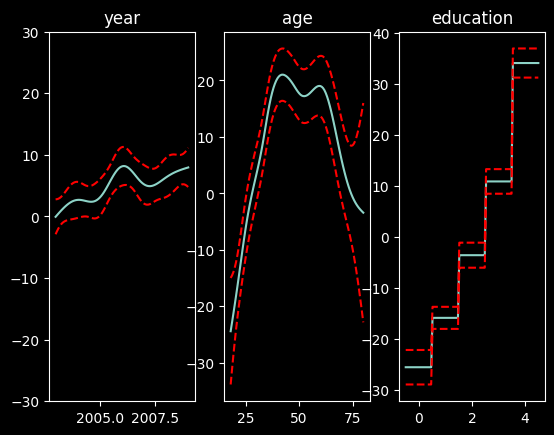

In [6]:
gam.gridsearch(X, y)
plt.figure();
fig, axs = plt.subplots(1,3);

titles = ['year', 'age', 'education']
for i, ax in enumerate(axs):
    XX = gam.generate_X_grid(term=i)
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
    if i == 0:
        ax.set_ylim(-30,30)
    ax.set_title(titles[i]);

In [7]:
gam.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     19.2602
Link Function:                     IdentityLink Log Likelihood:                                -24116.7451
Number of Samples:                         3000 AIC:                                            48274.0107
                                                AICc:                                           48274.2999
                                                GCV:                                             1250.3656
                                                Scale:                                           1235.9245
                                                Pseudo R-Squared:                                   0.2945
Feature Function                  Lam

C:\Users\benjf\AppData\Local\Temp\ipykernel_19344\3358381670.py:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()


In [9]:
gam1 = LinearGAM(s(0) + s(1) + f(2))
gam1.fit(X, y)


LinearGAM(callbacks=[Deviance(), Diffs()], fit_intercept=True, 
   max_iter=100, scale=None, terms=s(0) + s(1) + f(2) + intercept, 
   tol=0.0001, verbose=False)

In [28]:
importances = gam1.partial_dependence(0, width=.8)
len(importances[0])

100

In [29]:
im0 = importances[0]
im1 = importances[1].T
len(im1)

2

<Axes: >

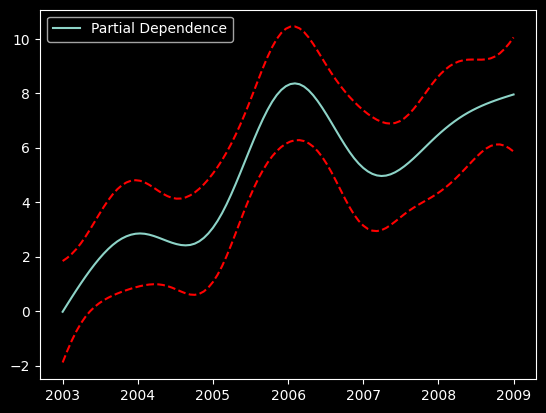

In [30]:
xx = gam1.generate_X_grid(term=0)
sns.lineplot(x=xx[:, 0], y=im0, label='Partial Dependence')
sns.lineplot(x=xx[:, 0], y=im1[0], color='red', linestyle='--')
sns.lineplot(x=xx[:, 0], y=im1[1], color='red', linestyle='--')

Some thoughts:
- The linear model does not have the feature_importances_ implementation. 
- Alternative 

## Using Data from ANOR project

NameError: name 'n_estimators' is not defined